In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trainMP=pd.read_csv(r'C:\Users\Nelson\Documents\Sync\Archivos de práctica Curso\trainMF.csv')# este archivo esta bien
trainMP=trainMP.drop('Unnamed: 0',axis=1)
trainMP

,Survived,Pclass,SibSp,Parch,Fare,Sex Encode,Embarked-2,Age-sep
0,0,3,1,0,7.250,1,2,1
1,1,1,1,0,712.833,0,0,3
2,1,3,0,0,7.925,0,2,2
3,1,1,1,0,53.100,0,2,3
4,0,3,0,0,8.050,1,2,3
...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.000,1,2,2
887,1,1,0,0,30.000,0,2,1
888,0,3,1,2,23.450,0,2,2
889,1,1,0,0,30.000,1,0,2


In [3]:
trainMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex Encode  891 non-null    int64  
 6   Embarked-2  891 non-null    int64  
 7   Age-sep     891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [5]:
"""from sklearn.preprocessing import StandardScaler
escalador=StandardScaler()
trainMP=escalador.fit_transform(X_train)
X_test=escalador.fit_transform(X_test)"""

'from sklearn.preprocessing import StandardScaler\nescalador=StandardScaler()\ntrainMP=escalador.fit_transform(X_train)\nX_test=escalador.fit_transform(X_test)'

In [4]:
trainME=trainMP.drop('Survived', axis=1)
y=trainMP['Survived'] 
X=trainME
np.unique(y,return_counts=True)#Descbalanceado60% 40% 1.6

(array([0, 1], dtype=int64), array([549, 342], dtype=int64))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_test

,Pclass,SibSp,Parch,Fare,Sex Encode,Embarked-2,Age-sep
709,3,1,1,152.458,1,0,2
439,2,0,0,10.500,1,2,2
840,3,0,0,7.925,1,2,1
720,2,0,1,33.000,0,2,0
39,3,1,0,112.417,0,0,1
...,...,...,...,...,...,...,...
494,3,0,0,8.050,1,2,1
359,3,0,0,78.792,0,1,2
65,3,1,1,152.458,1,0,2
481,2,0,0,0.000,1,2,2


In [37]:
from sklearn.tree import DecisionTreeClassifier
clasificador1=DecisionTreeClassifier(max_depth= 5, criterion='gini',random_state= 42)
clasificador1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [38]:
clasificador1.score(X_train, y_train)

0.8626155878467635

In [39]:
clasificador1.score(X_test, y_test)

0.835820895522388

In [9]:
from sklearn.tree import DecisionTreeClassifier#Cambio el peso  pero no cambia el score no estan tan desbalanceadas
clasificador2=DecisionTreeClassifier(max_depth= 5, criterion='gini',random_state= 42, class_weight={1:1.6})
clasificador2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={1: 1.6}, max_depth=5, random_state=42)

In [10]:
clasificador1.score(X_train, y_train)

0.8626155878467635

In [11]:
clasificador1.score(X_test, y_test)

0.835820895522388

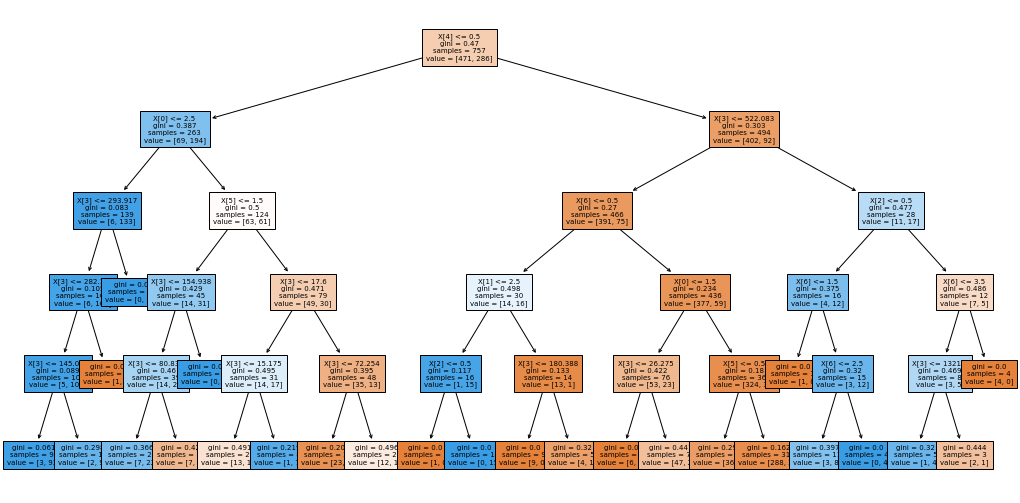

In [9]:
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
fig, ax = plt.subplots(figsize=(18, 9))
plot = plot_tree(decision_tree = clasificador1, filled=True,impurity= True,fontsize= 7,ax=ax)

In [9]:
from sklearn.metrics import confusion_matrix
y_predict=clasificador1.predict(X_test)
MC=confusion_matrix(y_test, y_predict)
MC

array([[73,  5],
       [17, 39]], dtype=int64)

In [34]:
from sklearn.tree import DecisionTreeClassifier
clasificador3=DecisionTreeClassifier(max_depth= 7, criterion='gini',random_state= 42)
clasificador3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
#Escalo para ver como cambia

In [35]:
clasificador3.score(X_train, y_train)

0.8943196829590488

In [36]:
clasificador3.score(X_test, y_test)#aumente la profundidad y No mejoró el test: Overfitting

0.8283582089552238

# Mejorar los hyperparameters

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}#Uso prunning directamente 
cladificadorCV=DecisionTreeClassifier(max_depth= None,min_samples_split = 2,min_samples_leaf  = 1,random_state=42)#No uso un gran earluy stopping, solo la profundidad.
MCV = GridSearchCV(estimator = cladificadorCV,param_grid = param_grid,scoring='accuracy',cv=10,refit=True,return_train_score = True)
MCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])},
             return_train_score=True, scoring='accuracy')

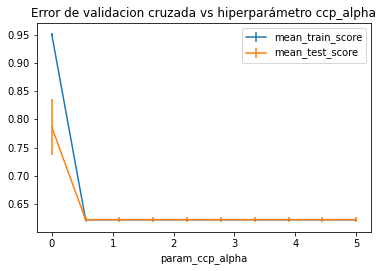

In [25]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(MCV.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [26]:
mejor_est = MCV.best_estimator_
mejor_est

DecisionTreeClassifier(random_state=42)

In [27]:
mejor_est.get_depth()

16

In [28]:
mejor_est.get_n_leaves()

177

In [31]:
from sklearn.metrics import accuracy_score
predicciones = mejor_est.predict(X = X_test)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 79.1044776119403 %


In [32]:
from sklearn.tree import DecisionTreeClassifier
clasificador5=DecisionTreeClassifier(max_depth=16, criterion='gini',random_state= 42,max_leaf_nodes=177)
clasificador5.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=16, max_leaf_nodes=177, random_state=42)

In [33]:
clasificador5.score(X_train, y_train)

0.9484808454425363

In [34]:
clasificador5.score(X_test, y_test)#Es mejor el clasificador 3

0.7910447761194029

In [35]:
clasificador3.feature_importances_

array([0.14520094, 0.05219103, 0.04836515, 0.20777049, 0.44919964,
       0.02762153, 0.06965122])

In [13]:
#La mas importante es la 5 que es sex
clasificador6=DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=20, min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
clasificador6.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=20)

In [14]:
clasificador6.score(X_test, y_test)

0.835820895522388

In [28]:
clasificador7=DecisionTreeClassifier(max_depth= 4, criterion='gini',random_state= 42, min_samples_split=10,min_samples_leaf=5)
clasificador7.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [29]:
clasificador7.score(X_test, y_test)

0.835820895522388

In [41]:
y_proba = clasificador7.predict_proba(X_test)
y_proba[:5, :]

array([[0.9       , 0.1       ],
       [0.9       , 0.1       ],
       [0.9       , 0.1       ],
       [0.03125   , 0.96875   ],
       [0.35897436, 0.64102564]])

In [44]:
df_predicciones = pd.DataFrame(data=y_proba, columns=['0', '1'])
df_predicciones['clasificacion_custom_0.8'] = np.where(df_predicciones['1'] > 0.8, 1, 0)
df_predicciones.iloc[:10, :]

,0,1,clasificacion_custom_0.8
0,0.900000,0.100000,0
1,0.900000,0.100000,0
2,0.900000,0.100000,0
3,0.031250,0.968750,1
4,0.358974,0.641026,0
5,0.031250,0.968750,1
6,0.358974,0.641026,0
7,0.900000,0.100000,0
8,0.358974,0.641026,0
9,0.250000,0.750000,0


In [51]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10) 
accuracies = list()
max_attributes = len(list(X_train))
depth_range = range(1, max_attributes + 1)
 
for depth in depth_range:
    fold_accuracy = []
    tree_model =DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1: 1.6})
    for train, test in cv.split(X_train,y_train):
        f_train = X_train.loc[train] 
        f_valid = X_train.loc[test] 
 
        model = tree_model.fit(X = f_train.drop(['top'], axis=1), 
                               y = f_train["top"]) 
        valid_acc = model.score(X = f_valid.drop(['top'], axis=1), 
                                y = f_valid["top"])
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    

df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([ 76,  78,  86,  96, 110,\n            ...\n            709, 712, 720, 736, 739],\n           dtype='int64', length=100). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [45]:
len(list(X_train))

7